## Wafer Fault Prediction

**Brief:** In electronics, a **wafer** (also called a slice or substrate) is a thin slice of semiconductor, such as a crystalline silicon (c-Si), used for the fabrication of integrated circuits and, in photovoltaics, to manufacture solar cells. The wafer serves as the substrate(serves as foundation for contruction of other components) for microelectronic devices built in and upon the wafer. 

### Problem Statement
Wafers are predominantly used to manufacture solar cells and are located at remote locations in bulk and they themselves consist of few hundreds of sensors. Wafers are fundamental of photovoltaic power generation, and production thereof requires high technology. Photovoltaic power generation system converts sunlight energy directly to electrical energy.

The motto behind figuring out the faulty wafers is to obliterate the need of having manual man-power doing the same. And make no mistake when we're saying this, even when they suspect a certain wafer to be faulty, they had to open the wafer from the scratch and deal with the issue, and by doing so all the wafers in the vicinity had to be stopped disrupting the whole process and stuff and this is when that certain wafer was indeed faulty, however, when their suspicion came outta be false negative, then we can only imagine the waste of time, man-power and ofcourse, cost incurred.

**Solution:** Data fetched by wafers is to be passed through the machine learning pipeline and it is to be determined whether the wafer at hand is faulty or not apparently obliterating the need and thus cost of hiring manual labour.

**Data:** Wafers data is taken from kaggle 

In [1]:
# Import Requires Libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load dataset as Dataframe
wafer = pd.read_csv('data/wafer.csv')
print('Shape of wafer data:', wafer.shape)
wafer.head()


Shape of wafer data: (100, 592)


,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [3]:
wafer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 592 entries, Unnamed: 0 to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 462.6+ KB


In [4]:
# Summary statistics of data
wafer.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,99.000000,100.000000,97.000000,97.000000,97.000000,97.0,97.000000,97.000000,100.000000,100.000000,...,34.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3017.301212,2487.180300,2202.168281,1484.362181,1.180367,100.0,97.449088,0.122195,1.461516,0.000243,...,74.331709,0.499390,0.013615,0.003549,2.727297,0.023510,0.014875,0.004685,77.430241,-0.880000
std,71.819707,66.954212,30.350606,460.985871,0.349654,0.0,5.553324,0.002006,0.071300,0.010610,...,41.857728,0.003431,0.004344,0.000873,0.875848,0.011991,0.007557,0.002527,55.106166,0.477367
min,2825.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.027900,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2973.040000,2446.595000,2189.966700,1111.543600,0.837300,100.0,95.108900,0.120800,1.407375,-0.006925,...,47.356000,0.497300,0.011300,0.003075,2.270425,0.013400,0.009475,0.002700,33.787600,-1.000000
50%,3004.390000,2493.890000,2200.988900,1244.289900,1.156900,100.0,99.513300,0.122200,1.453700,0.001000,...,65.127550,0.499400,0.012750,0.003400,2.546400,0.021800,0.013900,0.003850,62.059500,-1.000000
75%,3070.385000,2527.525000,2213.211100,1963.801600,1.383000,100.0,101.457800,0.123400,1.507425,0.008125,...,99.419050,0.501525,0.014700,0.003825,2.953750,0.028025,0.019200,0.005900,104.303400,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,107.152200,0.126200,1.641100,0.025000,...,223.101800,0.508700,0.043700,0.008900,8.816000,0.054500,0.040100,0.015000,223.101800,1.000000


the data will be standardised to help with any outliers in the dataset.

In [5]:
# check if the dataset is balanced in terms of target variable

wafer["Good/Bad"].value_counts()

Good/Bad
-1    94
 1     6
Name: count, dtype: int64

The dataset is inbalanced so it will need to be resampled.

In [6]:
# Check for missing independent and dependent feature 
wafer.isna().sum()

Unnamed: 0    0
Sensor-1      1
Sensor-2      0
Sensor-3      3
Sensor-4      3
             ..
Sensor-587    0
Sensor-588    0
Sensor-589    0
Sensor-590    0
Good/Bad      0
Length: 592, dtype: int64

some of the columns have missing entries, an impute strategy could be employed but if a target variable is missing will be best to delete the record as it serves no use during model building.

In [7]:
wafer["Good/Bad"].isna().sum()

0

There are no missing taregt variable so no need to delete the data record.

In [8]:
# Check the percentage of missing value
print(wafer.isna().sum().sum()/(wafer.shape[0]*wafer.shape[1]-1)*100)

3.895336069866045


About 4% of the dataset is missing, an `impute strategy` with least overall error value will be used.

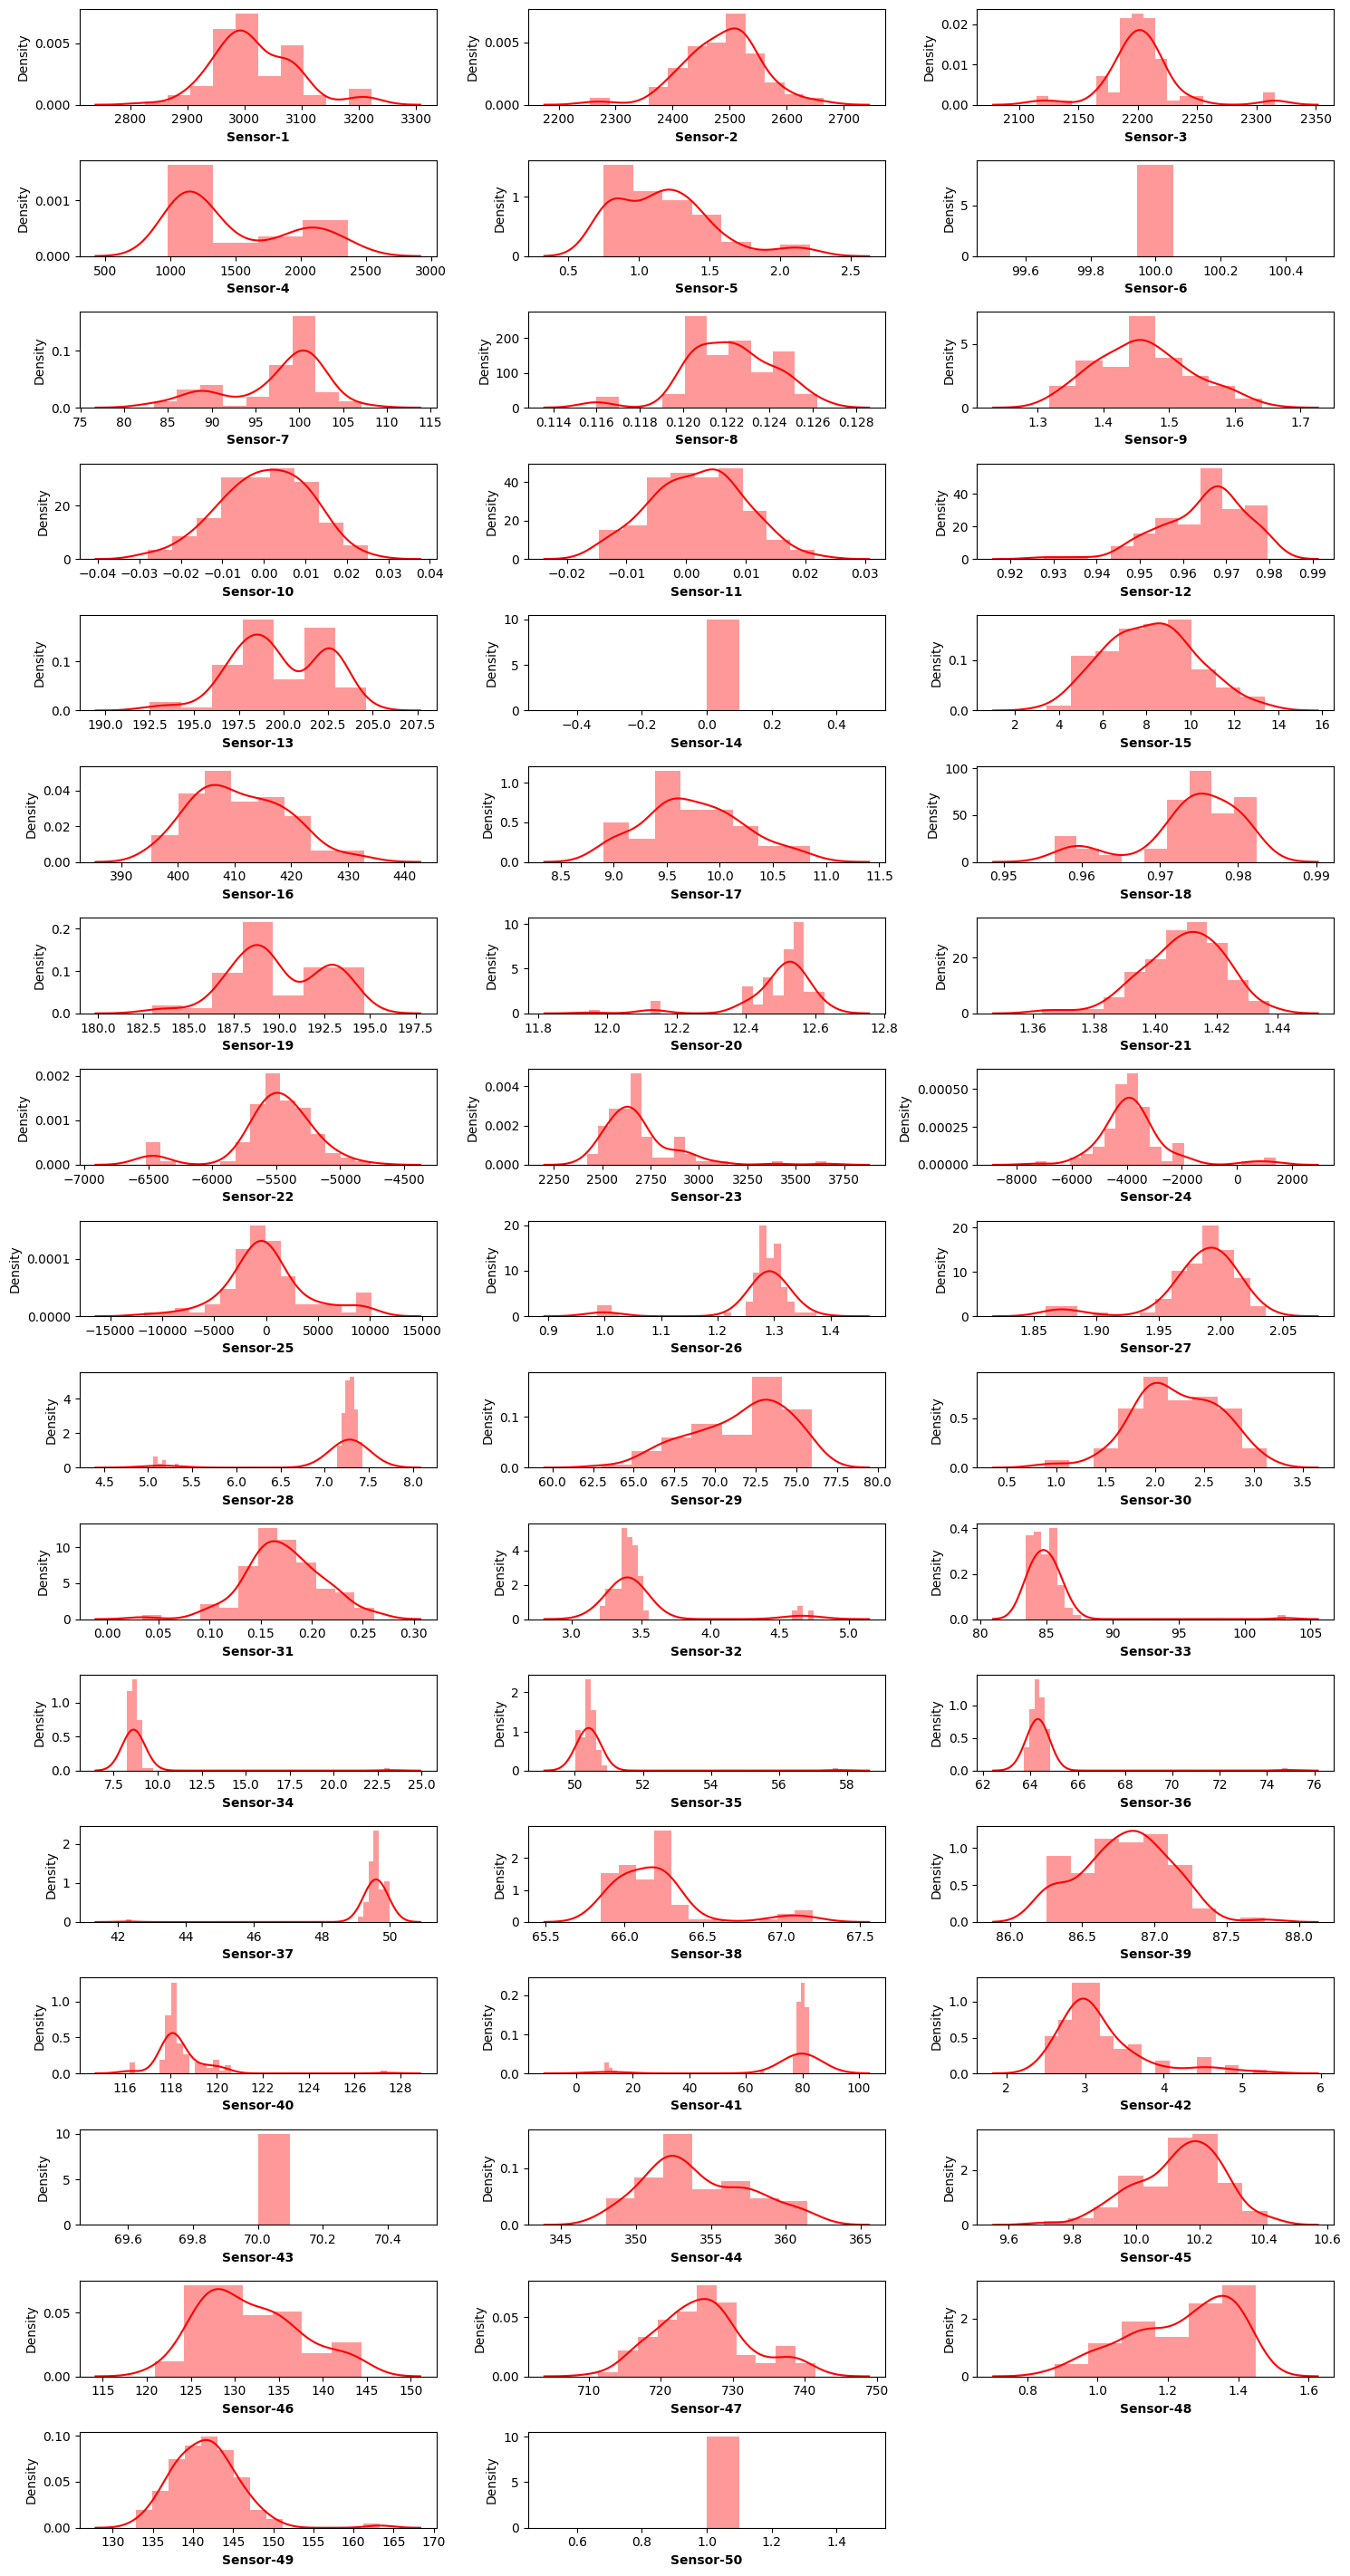

In [9]:
# visualizing the distribution of the first 20 wafer sensor.

plt.figure(figsize=(15, 100))

for i, col in enumerate(wafer.columns[1:51]):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=wafer[col], color='red')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

A significant portion of these features tend to fall into one of two categories: they either don't vary at all (with a standard deviation of 0) or they exhibit skewness, either to the left or the right. Analyzing each feature individually and addressing their outliers is impractical. Therefore, we must rely on a scaling approach.

For those features with a standard deviation of 0, we can safely remove them from consideration. For the remaining features that do have outliers, we should proceed with a technique called "Robust Scaling."

Drop columns with zero standard deviation as they are not influencing the target variable.

In [10]:
wafer.isna().sum()

Unnamed: 0    0
Sensor-1      1
Sensor-2      0
Sensor-3      3
Sensor-4      3
             ..
Sensor-587    0
Sensor-588    0
Sensor-589    0
Sensor-590    0
Good/Bad      0
Length: 592, dtype: int64

In [11]:
wafer.shape

(100, 592)

In [12]:
wafer.shape[0]

100

In [13]:
wafer.isna().sum().div(wafer.shape[0])

Unnamed: 0    0.00
Sensor-1      0.01
Sensor-2      0.00
Sensor-3      0.03
Sensor-4      0.03
              ... 
Sensor-587    0.00
Sensor-588    0.00
Sensor-589    0.00
Sensor-590    0.00
Good/Bad      0.00
Length: 592, dtype: float64

In [14]:
wafer.isna().sum().div(wafer.shape[0])>.7

Unnamed: 0    False
Sensor-1      False
Sensor-2      False
Sensor-3      False
Sensor-4      False
              ...  
Sensor-587    False
Sensor-588    False
Sensor-589    False
Sensor-590    False
Good/Bad      False
Length: 592, dtype: bool

In [15]:
def get_cols_with_zero_std(df: pd.DataFrame):
    """
    returns a list of columns having zero standard deviation
    """
    cols_to_drop = []
    num_cols = [col for col in df.columns if df[col].dtype !='O']
    for col in num_cols:
        if df[col].std() == 0:
            cols_to_drop.append(col)
    return cols_to_drop

def get_redundant_cols(df: pd.DataFrame, missing_percent=.7):
    """

    returns a list of columns having missing values more than certain thresh
    """
    cols_missing_ratios = df.isna().sum().div(df.shape[0])
    cols_to_drop = list(cols_missing_ratios[cols_missing_ratios > missing_percent].index)
    return cols_to_drop


In [16]:
#drop columns with more than 70% missing values
col_to_drop_1 = get_redundant_cols(wafer, missing_percent=0.7)
col_to_drop_1

['Sensor-158', 'Sensor-159', 'Sensor-293', 'Sensor-294']

In [17]:
## drop columns with std == 0
col_to_drop_2 = get_cols_with_zero_std(wafer)
col_to_drop_2

['Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-75',
 'Sensor-98',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-207',
 'Sensor-210',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-343',
 'Sensor-348',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Sensor-372',
 'Sensor-373',
 'Sensor-374',
 'Sensor-375',
 'Se

In [18]:
cols_to_drop = col_to_drop_1 + col_to_drop_2
cols_to_drop

['Sensor-158',
 'Sensor-159',
 'Sensor-293',
 'Sensor-294',
 'Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-75',
 'Sensor-98',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-207',
 'Sensor-210',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-343',
 'Sensor-348',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Se

these input features are not going to contribute to the model building because they either have too much `missing values`  or have `zero STD`

In [19]:
# Separate the feature from target variable

X = wafer.drop(cols_to_drop, axis=1)
y = wafer[['Good/Bad']]

In [20]:
X = X.drop(['Good/Bad', 'Unnamed: 0'], axis=1)

In [21]:
X.head()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
0,2968.33,2476.58,2216.7333,1748.0885,1.1127,97.5822,0.1242,1.5300,-0.0279,-0.0040,...,NaN,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876
1,2961.04,2506.43,2170.0666,1364.5157,1.5447,96.7700,0.1230,1.3953,0.0084,0.0062,...,NaN,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876
2,3072.03,2500.68,2205.7445,1363.1048,1.0518,101.8644,0.1220,1.3896,0.0138,0.0000,...,NaN,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876
3,3021.83,2419.83,2205.7445,1363.1048,1.0518,101.8644,0.1220,1.4108,-0.0046,-0.0024,...,NaN,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876
4,3006.95,2435.34,2189.8111,1084.6502,1.1993,104.8856,0.1234,1.5094,-0.0046,0.0121,...,NaN,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876


### Data Transformation:

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer


In [23]:
imputer = KNNImputer(n_neighbors=3)
preprocessing_pipeline = Pipeline(steps=[
    ('Imputer', imputer), ('Scalar', RobustScaler())
])
preprocessing_pipeline

Pipeline(steps=[('Imputer', KNNImputer(n_neighbors=3)),
                ('Scalar', RobustScaler())])

In [24]:
X.head()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
0,2968.33,2476.58,2216.7333,1748.0885,1.1127,97.5822,0.1242,1.5300,-0.0279,-0.0040,...,NaN,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876
1,2961.04,2506.43,2170.0666,1364.5157,1.5447,96.7700,0.1230,1.3953,0.0084,0.0062,...,NaN,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876
2,3072.03,2500.68,2205.7445,1363.1048,1.0518,101.8644,0.1220,1.3896,0.0138,0.0000,...,NaN,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876
3,3021.83,2419.83,2205.7445,1363.1048,1.0518,101.8644,0.1220,1.4108,-0.0046,-0.0024,...,NaN,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876
4,3006.95,2435.34,2189.8111,1084.6502,1.1993,104.8856,0.1234,1.5094,-0.0046,0.0121,...,NaN,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876


In [25]:
# transform 'wafer' features

X_trans = preprocessing_pipeline.fit_transform(X)
X_trans

array([[-0.37110152, -0.21388855,  0.67805794, ...,  0.46272494,
         0.515625  , -0.40093   ],
       [-0.44644841,  0.15494872, -1.32959552, ...,  0.46272494,
         0.515625  , -0.40093   ],
       [ 0.70070541,  0.08389967,  0.20530751, ...,  0.46272494,
         0.515625  , -0.40093   ],
       ...,
       [ 0.83289837, -1.31558137, -1.26792905, ..., -0.93573265,
        -0.671875  , -0.44021198],
       [-0.49988372,  0.59310515, -0.16308229, ..., -0.93573265,
        -0.671875  , -0.44021198],
       [-0.92374874, -0.35561596,  0.40033513, ..., -0.93573265,
        -0.671875  , -0.44021198]])

In [26]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [29]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from typing import Tuple
from dataclasses import dataclass
import numpy as np

@dataclass
class ClusterDataInstances:
    """Divides the given data instances into different clusters via KMeans Clustering algorithm.

    Args:
        X(np.array): Takes in an array which gotta be clustered.
        desc(str): Description of the said array
    """
    X: np.array
    desc: str

    def _get_ideal_number_of_clusters(self):
        """Returns the ideal number of clusters the given data instances should be divided into 
        by locating the dispersal point in number of clusers vs WCSS plot. 
        """

        try:
            print(f'Getting the idea number of clusers to cluster "{self.desc} set" into...')
            ## Compute WCSS for shortlisted number of clusters ##
            print("computing WCSS for shortlited number of clusters..")
            wcss = []
            for i in range(1,11):
                kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
                kmeans.fit(self.X)
                wcss.append(kmeans.inertia_)
            print(f'WCSS computed successfully for all shortlisted number of clusters')

            ### Finalise dispersal point as the ideal number of clusters
            print("finding the ideal number of clusters by locating the dispersal point via elbow method")

            knee_finder = KneeLocator(
                range(1,11), wcss, curve='convex', direction='decreasing'
            )
            print(f'Ideal number of clusters to be formed: {knee_finder.knee}')

            return knee_finder.knee
        
        except Exception as e:
            print(e)
            raise e
        
    def create_clusters(self)-> Tuple:
        """
        Divides the given data instances into the different clusters, they first hand shoud've been divided into
        via offcourse Kmeans Clustering algorithm.

        """
        try:
            ideal_clusters = self._get_ideal_number_of_clusters()
            print(f'dividing the \ "{self.desc}\" instances into {ideal_clusters} via kmeans clustering algorithm')

            kmeans =  KMeans(n_clusters=ideal_clusters,
                             init='k-means++', random_state=42)
            y_means = kmeans.fit_predict(self.X)
            print(f'data instance is divided into {ideal_clusters} clusters')

            return kmeans, np.c_[self.X, y_means]
        
        except Exception as e:
            print(e)
            raise e









In [35]:
## Cluster 'Wafer' instances
cluster_wafer = ClusterDataInstances(X=X_trans, desc="wafers features")
clusterer,X_clus = cluster_wafer.create_clusters()
X_clus

Getting the idea number of clusers to cluster "wafers features set" into...
computing WCSS for shortlited number of clusters..
WCSS computed successfully for all shortlisted number of clusters
finding the ideal number of clusters by locating the dispersal point via elbow method
Ideal number of clusters to be formed: 3
dividing the \ "wafers features" instances into 3 via kmeans clustering algorithm
data instance is divided into 3 clusters


array([[-0.37110152, -0.21388855,  0.67805794, ...,  0.515625  ,
        -0.40093   ,  0.        ],
       [-0.44644841,  0.15494872, -1.32959552, ...,  0.515625  ,
        -0.40093   ,  0.        ],
       [ 0.70070541,  0.08389967,  0.20530751, ...,  0.515625  ,
        -0.40093   ,  0.        ],
       ...,
       [ 0.83289837, -1.31558137, -1.26792905, ..., -0.671875  ,
        -0.44021198,  0.        ],
       [-0.49988372,  0.59310515, -0.16308229, ..., -0.671875  ,
        -0.44021198,  0.        ],
       [-0.92374874, -0.35561596,  0.40033513, ..., -0.671875  ,
        -0.44021198,  0.        ]])

In [36]:
# Unique clusters

np.unique(X_clus[:, -1])

array([0., 1., 2.])

The dataset has been divided into three Clusters.

In [44]:
# taking a look at the shape of the clusters
wafer_clus = np.c_[X_clus, y]

wafer_1 = wafer_clus[wafer_clus[:, -2] ==0 ]
wafer_1.shape

(96, 466)

In [45]:
wafer_2 = wafer_clus[wafer_clus[:, -2] == 1]
wafer_2.shape

(1, 466)

In [46]:
wafer_3 = wafer_clus[wafer_clus[:, -2] == 2]
wafer_3.shape

(3, 466)

Dividing the dataset into clusters is not useful for the project, must of the dataset are on one cluster group.

`Resampling` the training data is very important since the target variable is highly imbalanced.

In [47]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [49]:
from imblearn.combine import SMOTETomek

X, y = X_trans[:, :-1], y
resampler = SMOTETomek(sampling_strategy="auto")
X_res, y_res = resampler.fit_resample(X,y)

In [54]:
X_res.shape

(188, 463)

In [52]:
y_res.shape

(188, 1)

In [55]:
print("Before resampling, Shape of training instances: ", np.c_[X, y].shape)
print("After resampling, Shape of training instances: ", np.c_[X_res, y_res].shape)

Before resampling, Shape of training instances:  (100, 464)
After resampling, Shape of training instances:  (188, 464)


In [58]:
print(np.unique(y_res))
print(f"Value Counts: \n-1: {len(y_res[y_res == -1])}, 1: {len(y_res[y_res == 1])}")

[-1  1]
Value Counts: 
-1: 188, 1: 188


#### Splitting data into train and test data

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=1/3, random_state=42)

print(f"train set: {X_train.shape, y_train.shape}")
print(f"test set: {X_test.shape, y_test.shape}")

train set: ((125, 463), (125, 1))
test set: ((63, 463), (63, 1))


#### Model Selection and Training:

In [72]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_auc_score

# Shortlisted base Models
svc_clf = SVC(kernel='linear')
svc_rbf_clf = SVC(kernel='rbf')
random_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(objective='binary:logistic')


In [73]:
#  display scores

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviaton: ", scores.std())

### Evaluating `SVC(kernel='kernel') ` using cross-validation:

In [74]:
svc_scores = cross_val_score(svc_clf, X_train, y_train, scoring='roc_auc', cv=10,  verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [75]:
display_scores(svc_scores)

Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviaton:  0.0


In [76]:
## performance on test data using cross validation
svc_preds = cross_val_predict(svc_clf, X_test, y_test, cv=5)

# auc score
svc_auc = roc_auc_score(y_test, svc_preds)
svc_auc

0.9558823529411764

In [77]:
## SVC rbf Scores

svc_rbf_score = cross_val_score(svc_rbf_clf, X_train, y_train, scoring='roc_auc', cv=10, verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [78]:
display_scores(svc_rbf_score)

Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviaton:  0.0


In [81]:
svc_rbf_preds = cross_val_predict(svc_rbf_clf, X_test, y_test, cv=5)

svc_rbf_auc = roc_auc_score(y_test, svc_rbf_preds)
svc_rbf_auc

0.9508113590263692

### Evaluating `RandomForestClassifier` using cross-vallidation

In [82]:
## Random Forest Scores

random_clf_scores = cross_val_score(random_clf, X_train, y_train, scoring='roc_auc', cv=10, verbose=2)

[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s


In [83]:
display_scores(random_clf_scores)

Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviaton:  0.0


In [85]:
## Performance on test set using cross-validation

# Predictions using cross-validation
random_clf_preds = cross_val_predict(random_clf, X_test, y_test, cv=5)

# AUC score
random_clf_auc = roc_auc_score(y_test, random_clf_preds)
random_clf_auc

0.9827586206896552